<a href="https://colab.research.google.com/github/Laggssz/Solemne1_Mineria/blob/main/Mineria_Wester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias y Cliente Google

Elegi Australia para realizar la comparacion, por lo tanto buscare primero los graficos para 3 regiones de este pais, partiendo po Western Australia

In [1]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt
from datetime import datetime



In [2]:
client = bigquery.Client()

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
dataset_ref = client.dataset("covid19_vaccination_search_insights" , project = "bigquery-public-data")

In [5]:
dataset_ref

DatasetReference('bigquery-public-data', 'covid19_vaccination_search_insights')

In [6]:
dataset = client.get_dataset(dataset_ref)

In [7]:
tables = list(client.list_tables(dataset))

In [8]:
for table in tables:
  print(table.table_id)

covid19_vaccination_search_insights


In [10]:
tablref = dataset_ref.table("covid19_vaccination_search_insights")
table = client.get_table(tablref)

In [11]:
table

Table(TableReference(DatasetReference('bigquery-public-data', 'covid19_vaccination_search_insights'), 'covid19_vaccination_search_insights'))

# Visualizacion Preelimiinar de los datos

In [12]:
 client.list_rows(table, max_results=3000).to_dataframe()#.iloc[100:101]


,date,country_region,country_region_code,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,sub_region_3,sub_region_3_code,place_id,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
0,2021-07-26,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,47.427,18.745,NaN
1,2022-04-25,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,27.924,16.237,NaN
2,2022-05-16,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,19.010,NaN,NaN
3,2021-12-13,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,72.302,42.120,NaN
4,2022-01-24,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,142.110,75.230,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2021-01-25,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,7.731,2.141,NaN
2996,2021-11-29,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,39.745,18.280,2.331
2997,2022-07-18,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,15.042,8.709,1.703
2998,2023-03-06,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,6.088,3.243,NaN


# Graficos para Western Australia  ~ Vacunacion

In [13]:
rows = client.list_rows(table)

Results = []
contador = 0
fechas_un = set()

for row in rows:
    if contador >= 70:
        break
    if row[3] == "Western Australia":
        fecha = row[0]
        Vac = row[10]
        if fecha is not None and Vac is not None and fecha not in fechas_un:
            Results.append((fecha, Vac))
            fechas_un.add(fecha)
            contador += 1


results_or = sorted(Results, key=lambda x: x[0])
fechas = [x[0] for x in results_or]
Vacunas = [x[1] for x in results_or]

print("Fechas:", fechas)
print("Vacunaciones:", Vacunas)


Fechas: [datetime.date(2021, 1, 4), datetime.date(2021, 3, 15), datetime.date(2021, 3, 29), datetime.date(2021, 4, 19), datetime.date(2021, 4, 26), datetime.date(2021, 5, 24), datetime.date(2021, 5, 31), datetime.date(2021, 6, 7), datetime.date(2021, 6, 14), datetime.date(2021, 6, 21), datetime.date(2021, 6, 28), datetime.date(2021, 7, 5), datetime.date(2021, 7, 12), datetime.date(2021, 7, 19), datetime.date(2021, 7, 26), datetime.date(2021, 8, 2), datetime.date(2021, 8, 9), datetime.date(2021, 8, 16), datetime.date(2021, 8, 23), datetime.date(2021, 8, 30), datetime.date(2021, 9, 6), datetime.date(2021, 9, 13), datetime.date(2021, 9, 20), datetime.date(2021, 9, 27), datetime.date(2021, 10, 4), datetime.date(2021, 10, 11), datetime.date(2021, 10, 18), datetime.date(2021, 10, 25), datetime.date(2021, 11, 1), datetime.date(2021, 11, 8), datetime.date(2021, 11, 15), datetime.date(2021, 11, 22), datetime.date(2021, 11, 29), datetime.date(2021, 12, 6), datetime.date(2021, 12, 13), datetime.d

In [14]:
len(Vacunas)

70

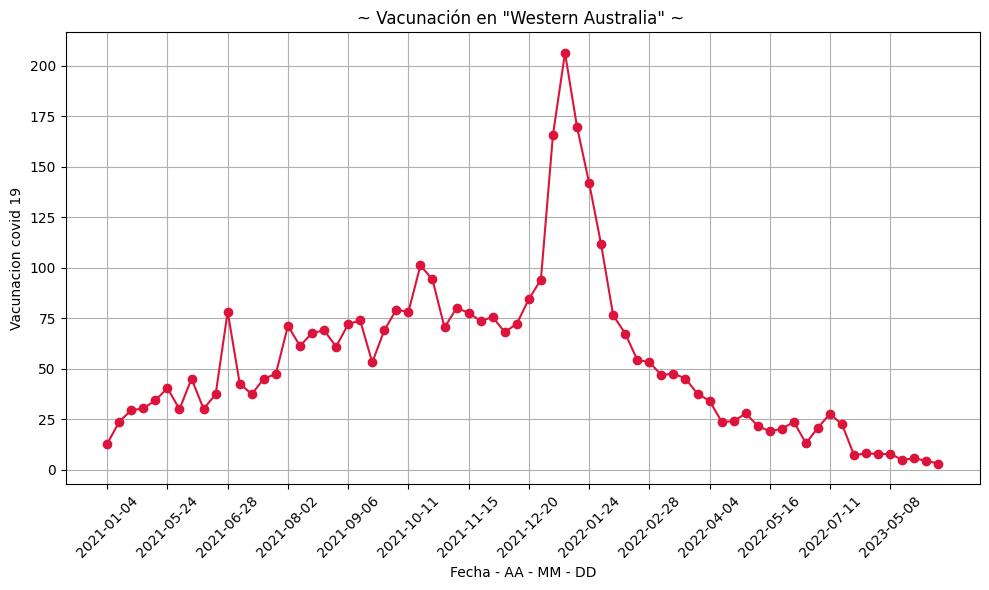

In [15]:

fechas_str = [fecha.strftime("%Y-%m-%d") for fecha in fechas]


plt.figure(figsize=(10, 6))
plt.plot(fechas_str, Vacunas, marker='o', linestyle='-' , color = 'crimson')
plt.title('~ Vacunación en "Western Australia" ~ ')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunacion covid 19')
plt.xticks(fechas_str[::5], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficos para Western Australia ~ Intencion

In [16]:
rows = client.list_rows(table)
Resuls1 = []
contador = 0
fechas_un1 = set()

for row in rows:
    if contador >= 70:
        break
    if row[3] == "Western Australia":
        fecha = row[0]
        Intencion1 = row[11]
        if fecha is not None and Intencion1 is not None and fecha not in fechas_un1:
            Resuls1.append((fecha, Intencion1))
            fechas_un1.add(fecha)
            contador += 1


resultados_or1 = sorted(Resuls1, key=lambda x: x[0])
fechas1 = [x[0] for x in resultados_or1 if x[0] is not None]
Intencion = [x[1] for x in resultados_or1 if x[1] is not None]


print("Fechas:", fechas1)
print("Intenciones:", Intencion)




Fechas: [datetime.date(2021, 1, 4), datetime.date(2021, 2, 8), datetime.date(2021, 4, 26), datetime.date(2021, 5, 24), datetime.date(2021, 6, 7), datetime.date(2021, 6, 21), datetime.date(2021, 6, 28), datetime.date(2021, 7, 5), datetime.date(2021, 7, 12), datetime.date(2021, 7, 19), datetime.date(2021, 7, 26), datetime.date(2021, 8, 2), datetime.date(2021, 8, 9), datetime.date(2021, 8, 16), datetime.date(2021, 8, 23), datetime.date(2021, 8, 30), datetime.date(2021, 9, 6), datetime.date(2021, 9, 13), datetime.date(2021, 9, 20), datetime.date(2021, 9, 27), datetime.date(2021, 10, 4), datetime.date(2021, 10, 11), datetime.date(2021, 10, 18), datetime.date(2021, 10, 25), datetime.date(2021, 11, 1), datetime.date(2021, 11, 8), datetime.date(2021, 11, 15), datetime.date(2021, 11, 22), datetime.date(2021, 11, 29), datetime.date(2021, 12, 6), datetime.date(2021, 12, 13), datetime.date(2021, 12, 20), datetime.date(2021, 12, 27), datetime.date(2022, 1, 3), datetime.date(2022, 1, 10), datetime.d

In [ ]:
len(fechas1)

70

In [ ]:
len(Intencion)

70

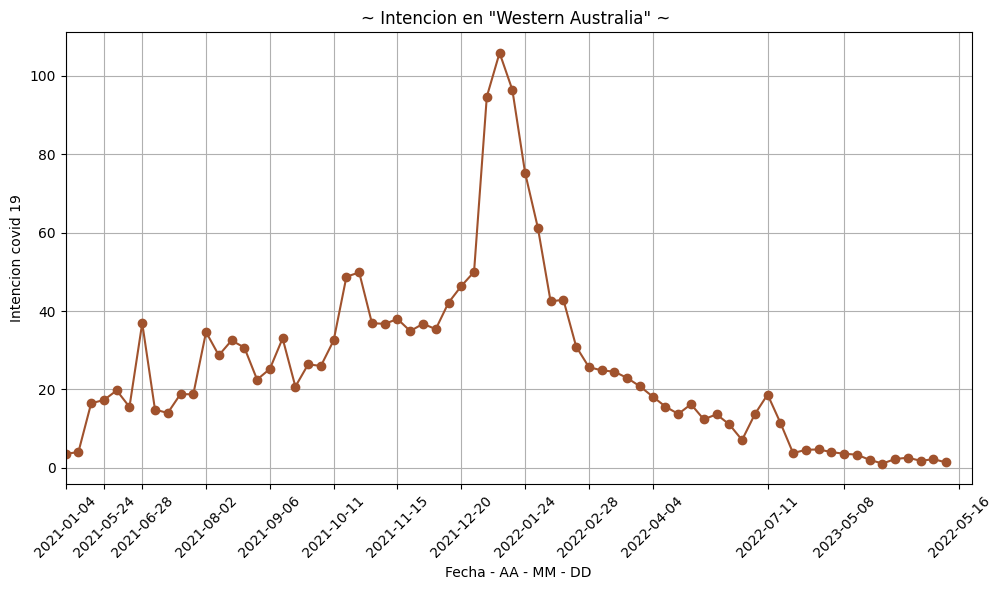

In [17]:
fecha_limite = datetime(2023, 8, 28)

fechas_str1 = [fecha.strftime("%Y-%m-%d") for fecha in fechas1]


plt.figure(figsize=(10, 6))
plt.plot(fechas_str1, Intencion, marker='o', linestyle='-' , color = 'sienna')
plt.title('~ Intencion en "Western Australia" ~ ')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Intencion covid 19')
plt.xticks(fechas_str[::5], rotation=45)
plt.grid(True)
plt.tight_layout()



plt.xlim(fechas_str1[0], fecha_limite.strftime("%Y-%m-%d"))

plt.show()

# Safety Side Effets Western Australia

In [18]:
rows = client.list_rows(table)

Results3 = []
contador = 0


for row in rows:
    if contador >= 70:
        break
    if row[3] == "Western Australia":
        fecha3 = row[0]
        Safe = row[12]
        if fecha3 is not None and Safe is not None:
            Results3.append((fecha3, Safe))
            contador += 1

results_or3 = sorted(Results3, key=lambda x: x[0])
fechas3 = [x[0] for x in results_or3 if x[0] is not None]
Safety = [x[1] for x in results_or3 if x[1] is not None]


print("Fechas:", fechas3)
print("Safety", Safety)


Fechas: [datetime.date(2021, 1, 4), datetime.date(2021, 1, 11), datetime.date(2021, 2, 1), datetime.date(2021, 2, 8), datetime.date(2021, 3, 15), datetime.date(2021, 3, 29), datetime.date(2021, 5, 3), datetime.date(2021, 6, 28), datetime.date(2021, 7, 5), datetime.date(2021, 7, 26), datetime.date(2021, 8, 16), datetime.date(2021, 9, 6), datetime.date(2021, 9, 6), datetime.date(2021, 9, 20), datetime.date(2021, 11, 1), datetime.date(2021, 11, 8), datetime.date(2021, 11, 22), datetime.date(2021, 11, 29), datetime.date(2021, 12, 20), datetime.date(2022, 1, 3), datetime.date(2022, 1, 10), datetime.date(2022, 2, 7), datetime.date(2022, 2, 14), datetime.date(2022, 4, 4), datetime.date(2022, 4, 11), datetime.date(2022, 4, 18), datetime.date(2022, 4, 25), datetime.date(2022, 5, 2), datetime.date(2022, 5, 9), datetime.date(2022, 5, 16), datetime.date(2022, 5, 30), datetime.date(2022, 6, 13), datetime.date(2022, 6, 20), datetime.date(2022, 6, 27), datetime.date(2022, 7, 18), datetime.date(2022, 

In [19]:
len(fechas3)

70

In [20]:
len(Safety)

70

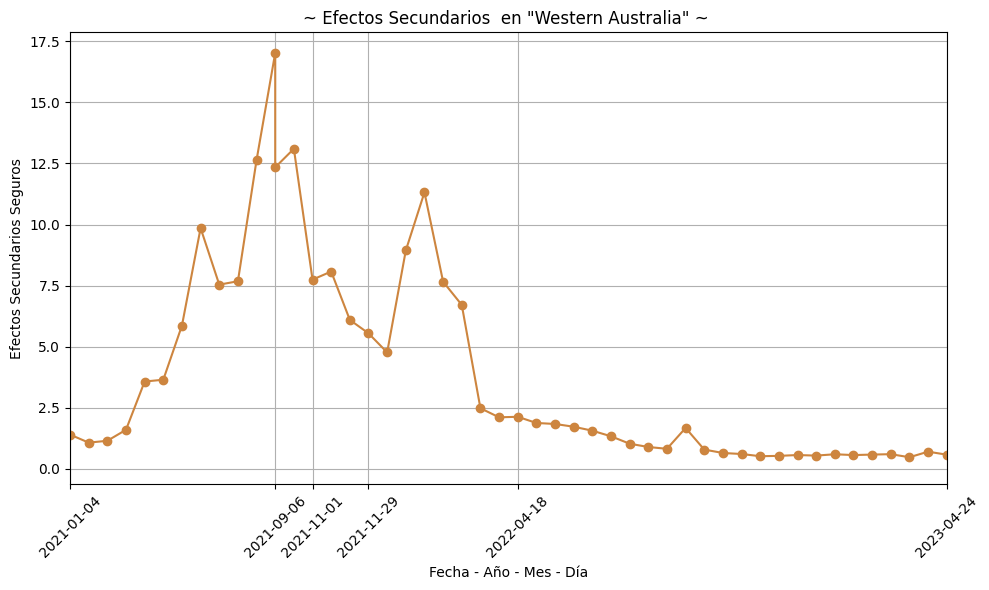

In [23]:


fecha_limite = datetime(2023, 4, 24)

fechas_str3 = [fecha.strftime("%Y-%m-%d") for fecha in fechas3]

plt.figure(figsize=(10, 6))
plt.plot(fechas_str3, Safety, marker='o', linestyle='-', color='peru')
plt.title('~ Efectos Secundarios  en "Western Australia" ~ ')
plt.xlabel('Fecha - Año - Mes - Día')
plt.ylabel('Efectos Secundarios Seguros')
plt.xticks(fechas_str[::4], rotation=45)
plt.grid(True)
plt.tight_layout()

# Establecer límites del eje x
plt.xlim(fechas_str3[0], fecha_limite.strftime("%Y-%m-%d"))

plt.show()


# Union Graficos Western Australia

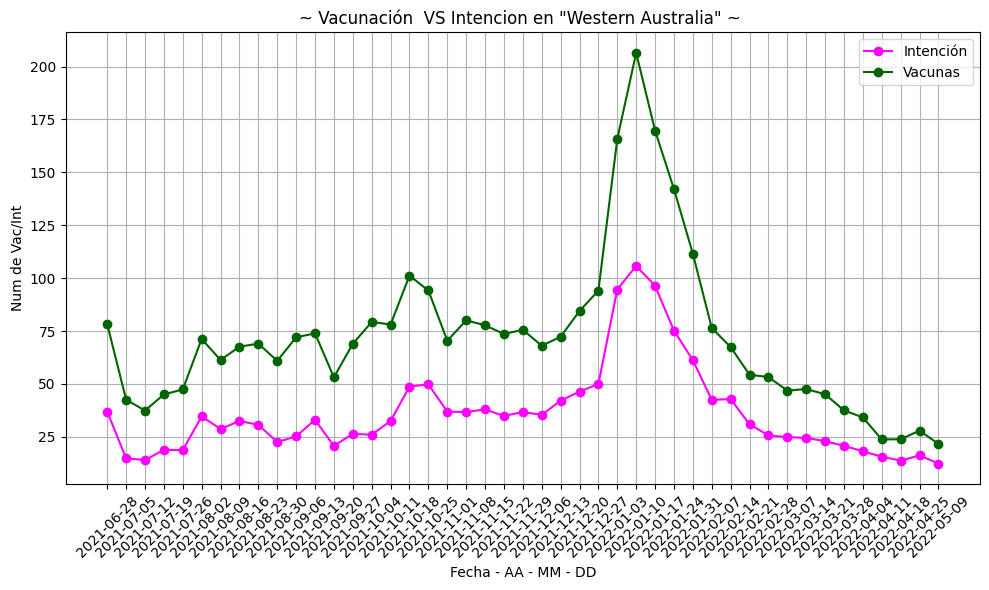

In [22]:

fecha_liminf = datetime(2021, 6, 28)
fecha_limsup = datetime(2022, 5, 9)

fechas_str1_filtered = []
Intencion_fil = []
for fecha, dato in zip(fechas_str1, Intencion):
    fecha_dt = datetime.strptime(fecha, "%Y-%m-%d")
    if fecha_liminf <= fecha_dt <= fecha_limsup :
        fechas_str1_filtered.append(fecha)
        Intencion_fil.append(dato)

fechas_str_filtered = []
Vacunas_fil= []
for fecha, dato in zip(fechas_str, Vacunas):
    fecha_dt = datetime.strptime(fecha, "%Y-%m-%d")
    if fecha_liminf <= fecha_dt <= fecha_limsup :
        fechas_str_filtered.append(fecha)
        Vacunas_fil.append(dato)


plt.figure(figsize=(10, 6))
plt.plot(fechas_str1_filtered, Intencion_fil, marker='o', linestyle='-' , color='magenta', label='Intención')
plt.plot(fechas_str_filtered, Vacunas_fil, marker='o', linestyle='-' , color='darkgreen', label='Vacunas')
plt.title('~ Vacunación  VS Intencion en "Western Australia" ~ ')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Num de Vac/Int')
plt.xticks( rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()
